# Exploratory Data Analysis(EDA)

Exploratory Data Analysis (EDA) is a critical step in understanding the H1N1 and Seasonal Flu Vaccine Prediction dataset. The aim is not just to summarize the data, but to uncover patterns, trends, and relationships that can explain why some people choose to take vaccine shot or not.

Through this process, we will:

- Understanding the distribution of our target variables (`h1n1_vaccine` and `seasonal_vaccine`) is crucial. This will tell us the vaccination rates in our dataset and reveal if we are dealing with a class imbalance problem.

- Analyze individual features to understand their distributions. We will look at key demographic, behavioral, and opinion-based features.

- Explore how different features relate to the likelihood of vaccination. This is where we can start to form hypotheses about what factors are most predictive.

- Visualize the correlation between numerical features. This can help us spot multicollinearity (where features are highly correlated with each other), which can be an issue for some models..

- Generate hypotheses that can guide modeling and business recommendations.


EDA will therefore bridge the gap between the business problem and the analytical solution providing a solid foundation for the next phase: **Data Preprocessing** , ensuring our model outputs are interpretable and actionable for stakeholders.

In [1]:
# import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import re


#import sklearn libraries
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from imblearn.over_sampling import SMOTE, SMOTEN
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, RFECV
# from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score, roc_curve
from imblearn.pipeline import Pipeline as ImbPipeline

In [2]:
data = pd.read_csv("cleannew.csv")
data[:3]

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,fcxhlnwr,xtkaffoo,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26707 non-null  float64
 2   h1n1_knowledge               26707 non-null  float64
 3   behavioral_antiviral_meds    26707 non-null  float64
 4   behavioral_avoidance         26707 non-null  float64
 5   behavioral_face_mask         26707 non-null  float64
 6   behavioral_wash_hands        26707 non-null  float64
 7   behavioral_large_gatherings  26707 non-null  float64
 8   behavioral_outside_home      26707 non-null  float64
 9   behavioral_touch_face        26707 non-null  float64
 10  doctor_recc_h1n1             26707 non-null  float64
 11  doctor_recc_seasonal         26707 non-null  float64
 12  chronic_med_condition        26707 non-null  float64
 13  child_under_6_mo

In [ ]:
# drop irrelevant columns
data.drop(['employment_industry', 'employment_occupation','hhs_geo_region'], axis=1, inplace=True)

In [ ]:
# map ordinal categorical columns
age_map = {'18 - 34 Years':0, '35 - 44 Years':1, '45 - 54 Years':2, '55 - 64 Years':3, '65+ Years':4}
inc_map = {'Below Poverty':0, '<= $75,000, Above Poverty':1, '> $75,000':2}
cen_map = {'Non-MSA':0, 'MSA, Not Principle  City':1, 'MSA, Principle City':1}
edu_map = {'< 12 Years':0, '12 Years':1, 'Some College':2, 'College Graduate':3}

In [ ]:
# execute mapping
data['age_group'] = data['age_group'].map(age_map)
data['income_poverty'] = data['income_poverty'].map(inc_map)
data['census_msa'] = data['census_msa'].map(cen_map)
data['education'] = data['education'].map(edu_map)

In [ ]:
# one hot encode the rest of the categorical columns
col2 = data[['race', 'sex','rent_or_own', 'employment_status','marital_status']]
col2_ohe = pd.get_dummies(col2, drop_first=True, dtype=int)

In [ ]:
# drop the residual categorical columns
data.drop(col2, axis=1, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26707 non-null  float64
 2   h1n1_knowledge               26707 non-null  float64
 3   behavioral_antiviral_meds    26707 non-null  float64
 4   behavioral_avoidance         26707 non-null  float64
 5   behavioral_face_mask         26707 non-null  float64
 6   behavioral_wash_hands        26707 non-null  float64
 7   behavioral_large_gatherings  26707 non-null  float64
 8   behavioral_outside_home      26707 non-null  float64
 9   behavioral_touch_face        26707 non-null  float64
 10  doctor_recc_h1n1             26707 non-null  float64
 11  doctor_recc_seasonal         26707 non-null  float64
 12  chronic_med_condition        26707 non-null  float64
 13  child_under_6_mo

## Feature Engineering

Feature engineering is the process of using domain knowledge to create new features from the existing data. These new features can help improve the performance of machine learning models. Here, we will create two new scores: a **Precautionary Behavior Score** and a **Health Vulnerability Score**.

### 1. Precautionary Behavior Score

We can combine all the behavioral columns into a single score that represents a person's overall level of precautionary behavior. A simple and effective way to do this is to sum up the binary values (`0` or `1`) of these columns.

**Columns to be used:**
* `behavioral_antiviral_meds`
* `behavioral_avoidance`
* `behavioral_face_mask`
* `behavioral_wash_hands`
* `behavioral_large_gatherings`
* `behavioral_outside_home`
* `behavioral_touch_face`

In [4]:
# Create a 'precautionary_score' by summing up behavioral columns
behavioral_cols = [
    'behavioral_antiviral_meds', 'behavioral_avoidance',
    'behavioral_face_mask', 'behavioral_wash_hands',
    'behavioral_large_gatherings', 'behavioral_outside_home',
    'behavioral_touch_face']

data['precautionary_score'] = data[behavioral_cols].sum(axis=1)


### 2. Health Vulnerability Score

Next, we'll create a feature that quantifies a person's potential health vulnerability. This score will combine age, chronic medical conditions, and regular contact with young children.

**Logic:**
1.  **Map `age_group` to a numerical scale:** We will assign a higher score to older age groups, as they are generally more vulnerable to severe flu.
2.  **Combine with other vulnerability factors:** We will add the scores from `chronic_med_condition` and `child_under_6_months`. A higher final score indicates greater vulnerability.

In [5]:
# Define mappings for age_group. Higher score = higher vulnerability.
age_mapping = {
    '18 - 34 Years': 1,
    '35 - 44 Years': 2,
    '45 - 54 Years': 3,
    '55 - 64 Years': 4,
    '65+ Years': 5
}
data['age_score'] = data['age_group'].map(age_mapping)

# Define weights for each component of the vulnerability score
# We can weigh chronic conditions and having a young child more heavily
# as they represent more direct health vulnerabilities.
w_age = 1.0
w_chronic = 2.0
w_child = 2.0

# Calculate the Health Vulnerability Score
# We use .fillna(0) to handle any potential missing values after mapping
data['health_vulnerability_score'] = (
    w_age * data['age_score'] +
    w_chronic * data['chronic_med_condition'] +
    w_child * data['child_under_6_months']
).fillna(0)



## Univariate Analysis
Let's analyze individual features to understand their distributions. We will look at key demographic, behavioral, and opinion-based features.

**Key Questions:**
* What is the age, education, and race distribution of the survey respondents?
* How concerned are people about H1N1? How effective do they think the vaccine is?
* Did most people receive a recommendation from their doctor?

#### Demographic Features

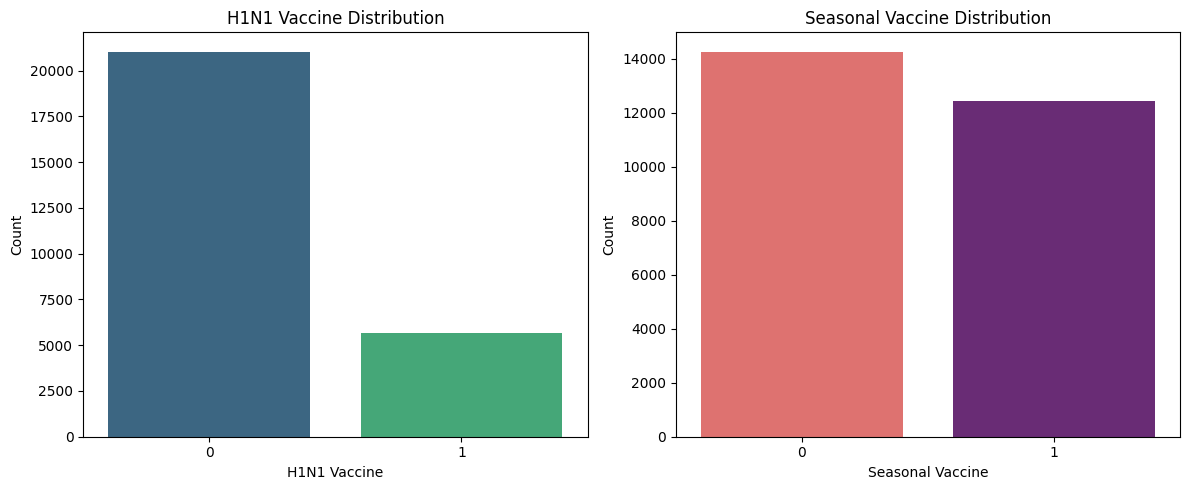

In [15]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='h1n1_vaccine', data=data, palette='viridis')
plt.title('H1N1 Vaccine Distribution')
plt.xlabel('H1N1 Vaccine')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(x='seasonal_vaccine', data=data, palette='magma_r')
plt.title('Seasonal Vaccine Distribution')
plt.xlabel('Seasonal Vaccine')
plt.ylabel('Count')
plt.tight_layout()


**Observation:** From the visualization we can see that a larger demographic have taken the seasonal vaccine as compared to the H1N1 vaccine and we can see that there is a significant class imbalance on H1N1 vaccine compared to the Seasonal Vaccine

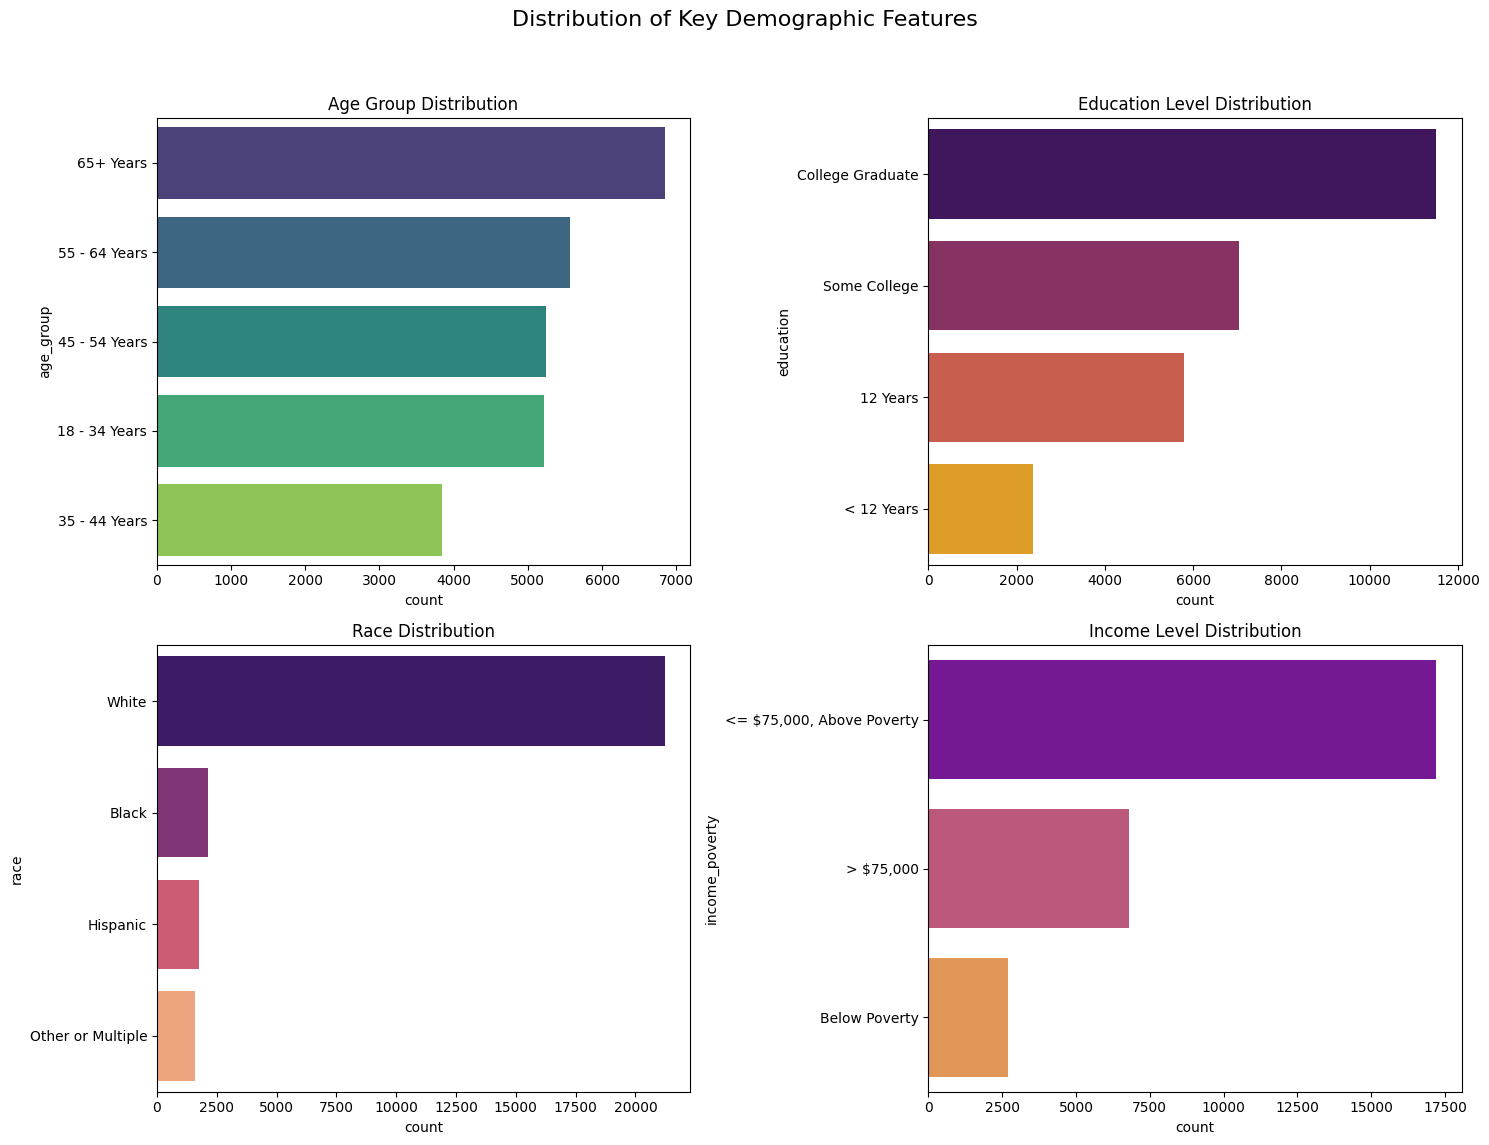

In [14]:
# Plotting key demographic features
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Distribution of Key Demographic Features', fontsize=16)

sns.countplot(y='age_group', data=data, ax=axes[0,0], order=data['age_group'].value_counts().index, palette='viridis')
axes[0,0].set_title('Age Group Distribution')

sns.countplot(y='education', data=data, ax=axes[0,1], order=data['education'].value_counts().index, palette='inferno')
axes[0,1].set_title('Education Level Distribution')

sns.countplot(y='race', data=data, ax=axes[1,0], order=data['race'].value_counts().index, palette='magma')
axes[1,0].set_title('Race Distribution')

sns.countplot(y='income_poverty', data=data, ax=axes[1,1], order=data['income_poverty'].value_counts().index, palette='plasma')
axes[1,1].set_title('Income Level Distribution')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Observation:** We can get some conclusive observations such as the majority of the demographic are white people and are above poverty levels earning at most $75000 per year. There is a slightly even age group distribution with the most coming from ages 65+ years and above

#### Opinion and Behavioral Features

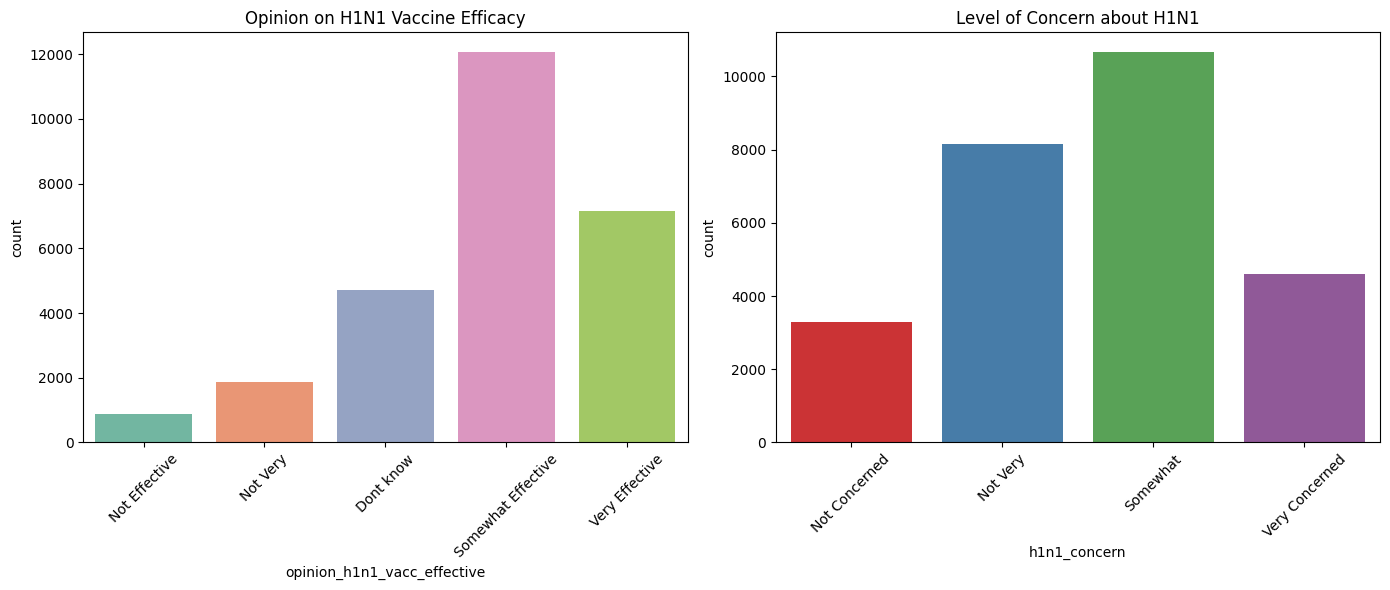

In [25]:
# Plotting key opinion and behavioral features
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(x='opinion_h1n1_vacc_effective', data=data, ax=axes[0], palette='Set2')
axes[0].set_title('Opinion on H1N1 Vaccine Efficacy')
axes[0].set_xticklabels(['Not Effective', 'Not Very', 'Dont know', 'Somewhat Effective', 'Very Effective'])
axes[0].tick_params(axis='x', rotation=45)

sns.countplot(x='h1n1_concern', data=data, ax=axes[1], palette='Set1')
axes[1].set_title('Level of Concern about H1N1')
axes[1].set_xticklabels(['Not Concerned', 'Not Very', 'Somewhat', 'Very Concerned'])
axes[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

**Observation and Summary:** *Efficacy vs. Concern* : There's a notable difference between how people perceive the vaccine's efficacy and their level of concern about the virus. While a large number of people believe the vaccine is effective, an even larger group expresses some level of concern about the virus itself.

*Public Health Implications* : The data suggests that public health campaigns about H1N1 could focus on turning "Somewhat" effective opinions into "Very" effective ones to increase confidence. Additionally, the high number of "Don't know" responses about efficacy indicates a need for clearer, more accessible information to educate the public. The overall high level of concern about the virus could be leveraged to promote vaccination efforts

### Bivariate Analysis (Exploring Relationships)

Now, let's explore how different features relate to the likelihood of vaccination. This is where we can start to form hypotheses about what factors are most predictive.

**Key Questions:**
* How does a doctor's recommendation influence vaccination rates for both vaccines?
* Is there a difference in vaccination rates across different age groups, races or education levels?
* Do people with chronic medical conditions have higher vaccination rates?


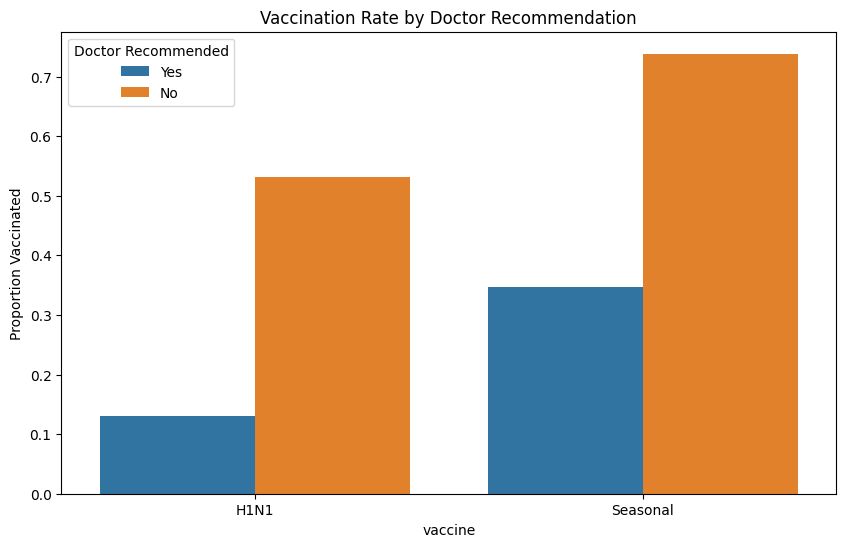

In [39]:
# Melt the dataframe to analyze both doctor recommendations side-by-side
doc_rec = pd.melt(data, id_vars=['respondent_id'], value_vars=['doctor_recc_h1n1', 'doctor_recc_seasonal'], var_name='vaccine_type', value_name='doctor_recommendation')
vaccine_status = pd.melt(data, id_vars=['respondent_id'], value_vars=['h1n1_vaccine', 'seasonal_vaccine'], var_name='vaccine_type', value_name='vaccinated')

# Merge and plot
plot_df = pd.DataFrame({
    'vaccine': np.where(doc_rec['vaccine_type'] == 'doctor_recc_h1n1', 'H1N1', 'Seasonal'),
    'doctor_recommendation': doc_rec['doctor_recommendation'],
    'vaccinated': vaccine_status['vaccinated']
})

plt.figure(figsize=(10, 6))
sns.barplot(x='vaccine', y='vaccinated', hue='doctor_recommendation', data=plot_df, ci=None)
plt.title('Vaccination Rate by Doctor Recommendation')
plt.ylabel('Proportion Vaccinated')
plt.legend(title='Doctor Recommended', labels=['Yes', 'No'])
plt.show()

**Observation:** A doctor's recommendation appears to be a very strong indicator of whether someone gets vaccinated, for both H1N1 and seasonal flu. This will likely be a highly predictive feature.

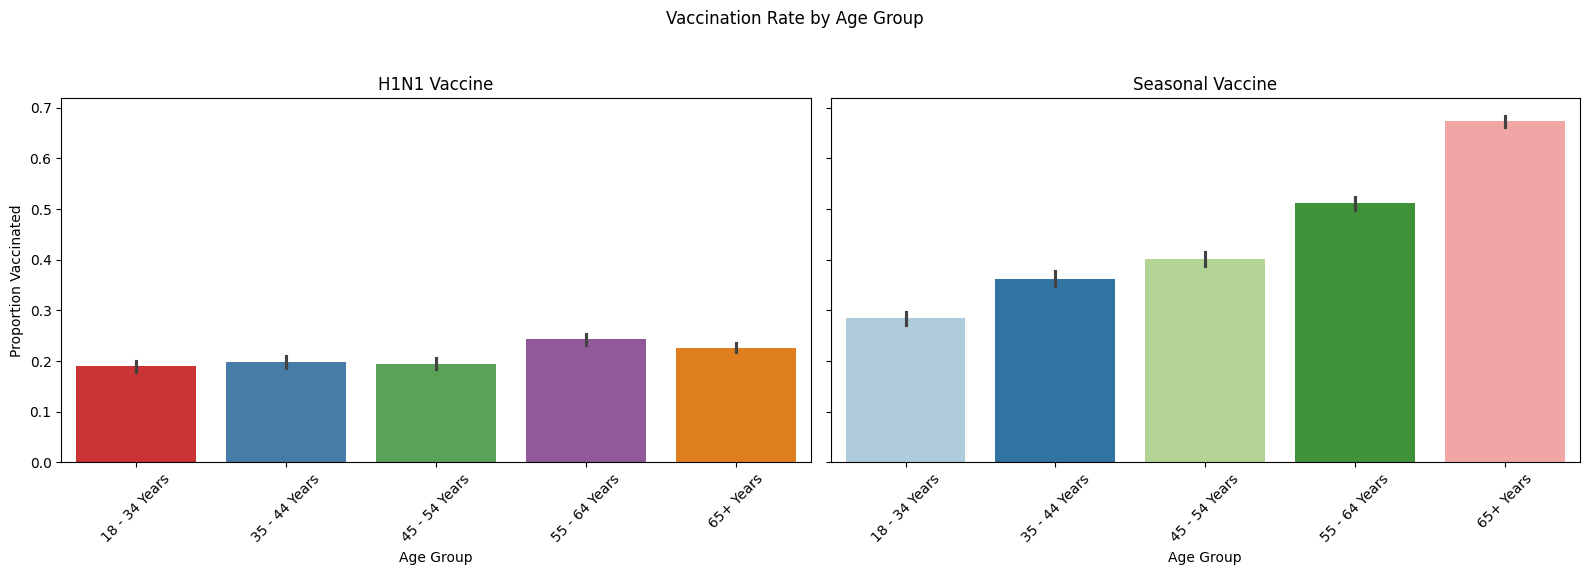

In [27]:
# Age Group vs. Vaccination
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
fig.suptitle('Vaccination Rate by Age Group')

# H1N1
sns.barplot(x='age_group', y='h1n1_vaccine', data=data, ax=axes[0], order=['18 - 34 Years', '35 - 44 Years', '45 - 54 Years', '55 - 64 Years', '65+ Years'], palette='Set1')
axes[0].set_title('H1N1 Vaccine')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Proportion Vaccinated')
axes[0].tick_params(axis='x', rotation=45)

# Seasonal
sns.barplot(x='age_group', y='seasonal_vaccine', data=data, ax=axes[1], order=['18 - 34 Years', '35 - 44 Years', '45 - 54 Years', '55 - 64 Years', '65+ Years'], palette='Paired')
axes[1].set_title('Seasonal Vaccine')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Observation:** There is a clear trend showing that older age groups are significantly more likely to receive the seasonal flu vaccine. The trend is also present but less pronounced for the H1N1 vaccine.



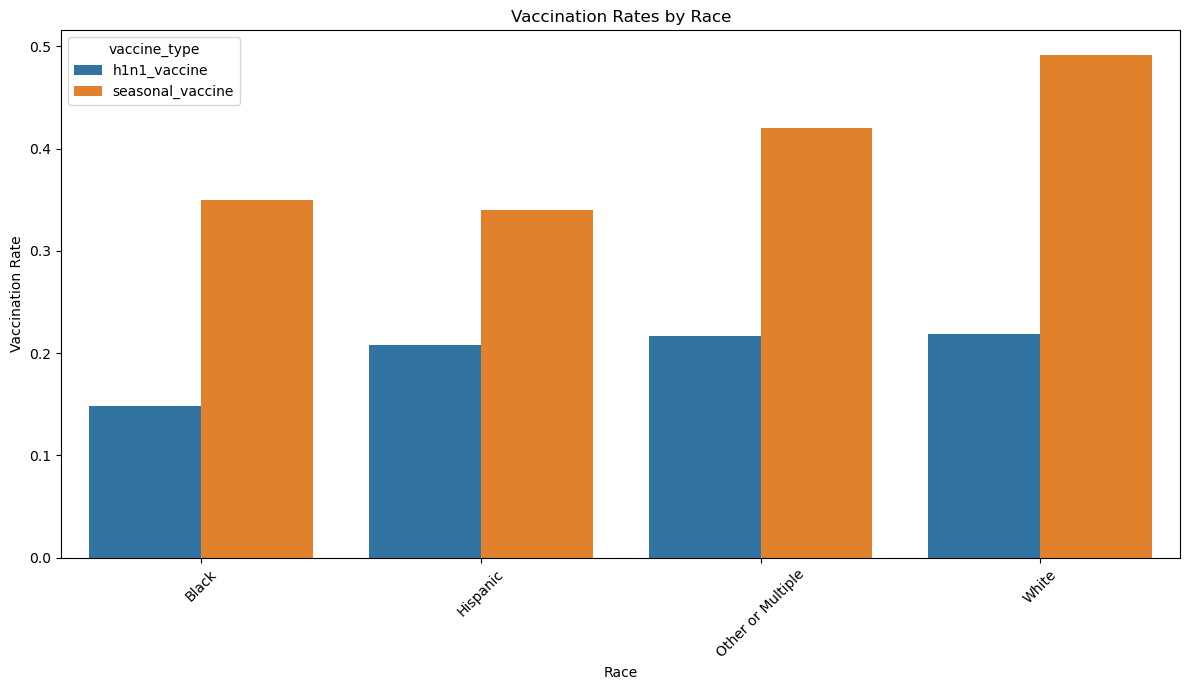

In [ ]:
vaccination_by_race = data.groupby('race')[['h1n1_vaccine', 'seasonal_vaccine']].mean().reset_index()
vaccination_by_race_melted = vaccination_by_race.melt(id_vars='race', var_name='vaccine_type', value_name='vaccination_rate')

plt.figure(figsize=(12, 7))
sns.barplot(x='race', y='vaccination_rate', hue='vaccine_type', data=vaccination_by_race_melted)
plt.title('Vaccination Rates by Race')
plt.xlabel('Race')
plt.ylabel('Vaccination Rate')
plt.xticks(rotation=45)
plt.tight_layout()


**Observation:** The relative order of vaccination rates among the racial groups (White > Hispanic > Other > Black) is consistent for both H1N1 and seasonal vaccines. White individuals have the highest vaccination rates, and Black individuals have the lowest.

**Summary and Implications:** The lower rates among Black and Hispanic communities, especially for the H1N1 vaccine, point to potential issues related to healthcare access, socioeconomic factors, historical mistrust in the medical system, and targeted public health messaging.

To close these gaps, public health strategies would need to be tailored to address specific barriers faced by different racial groups, moving beyond a one-size-fits-all approach. This could include community-based outreach, culturally sensitive messaging, and addressing historical and systemic reasons for medical mistrust.

### Correlation Analysis

A heatmap is a great way to visualize the correlation between numerical features. This can help us spot multicollinearity (where features are highly correlated with each other), which can be an issue for some models.

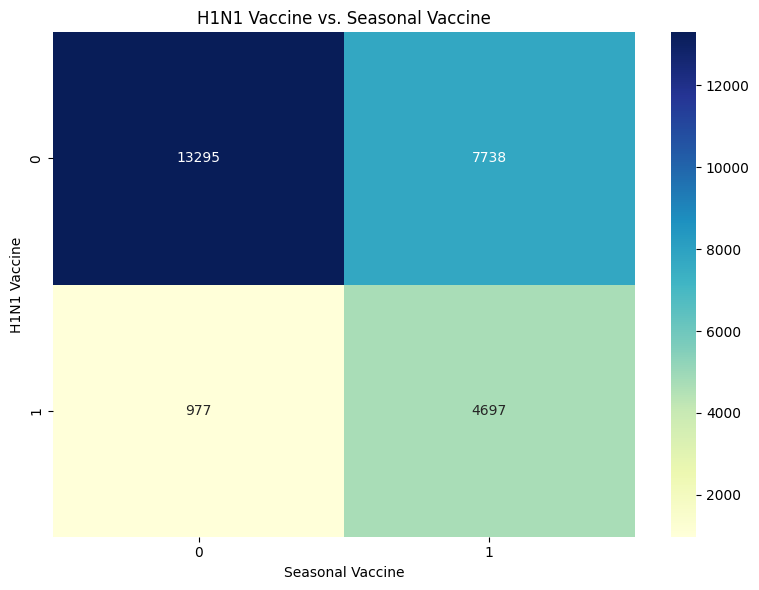

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(pd.crosstab(data['h1n1_vaccine'], data['seasonal_vaccine']), annot=True, fmt='d', cmap='YlGnBu')
plt.title('H1N1 Vaccine vs. Seasonal Vaccine')
plt.xlabel('Seasonal Vaccine')
plt.ylabel('H1N1 Vaccine')
plt.tight_layout()


**Summary and Observations:** There is a strong positive correlation between getting the H1N1 vaccine and getting the seasonal vaccine. A person who gets the H1N1 vaccine is far more likely to also get the seasonal vaccine (4,697 individuals) than to not get it (977 individuals). This suggests that a person's decision to get vaccinated is not vaccine-specific but rather a general health behavior.

The large number of people who received the seasonal vaccine but not the H1N1 vaccine highlights the H1N1 vaccine's novelty or a lack of public acceptance compared to the well-established seasonal vaccine. Public health campaigns might need to address this gap, perhaps by linking the new vaccine to the existing, more familiar one.

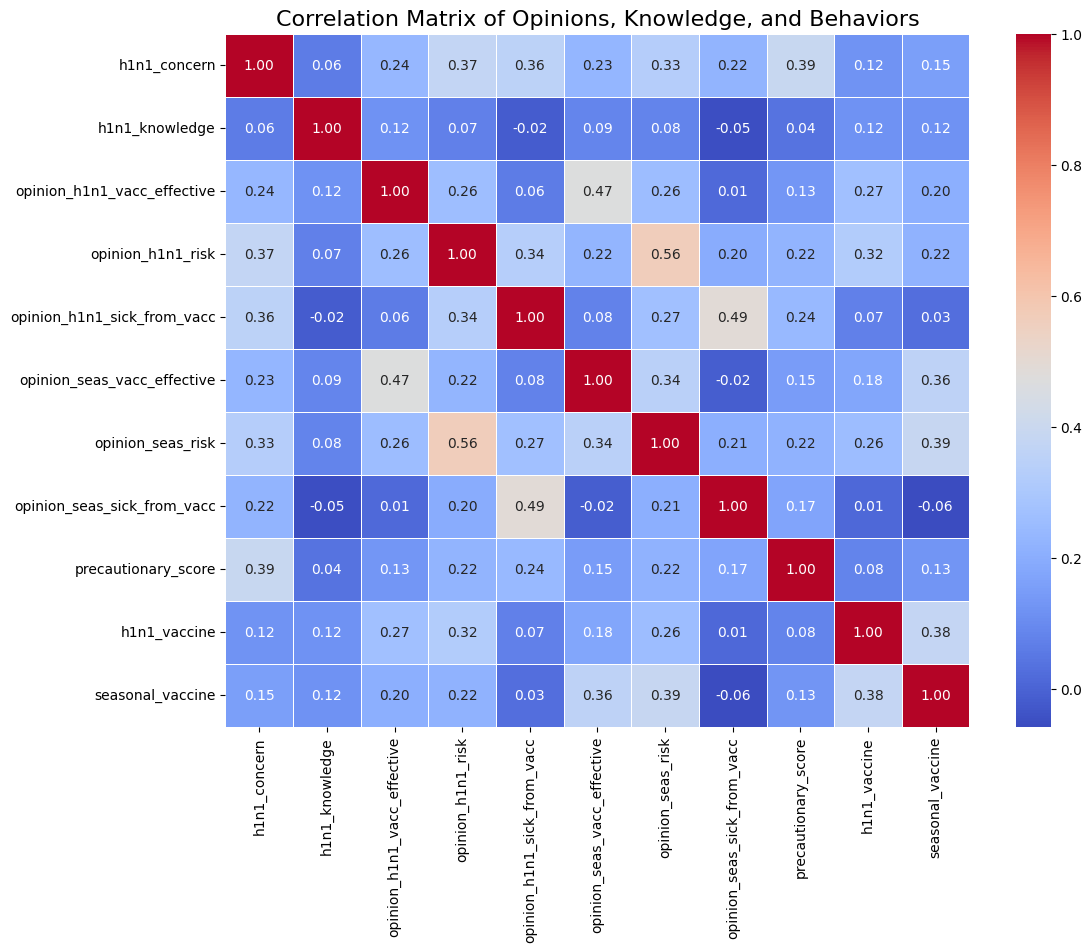

In [30]:
# Select numerical columns for correlation analysis
corr_cols = [
    'h1n1_concern', 'h1n1_knowledge', 'opinion_h1n1_vacc_effective',
    'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc',
    'opinion_seas_vacc_effective', 'opinion_seas_risk',
    'opinion_seas_sick_from_vacc', 'precautionary_score','h1n1_vaccine','seasonal_vaccine'
]

# Calculate the correlation matrix
correlation_matrix = data[corr_cols].corr()

# Create the heatmap
plt.figure(figsize=(12, 9))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=.5
)

# Add titles
plt.title('Correlation Matrix of Opinions, Knowledge, and Behaviors', fontsize=16)
plt.show()

**Observation:** We can see some interesting correlations. For example, opinions about H1N1 risk and vaccine effectiveness are correlated with opinions about the seasonal flu. The two target variables (`h1n1_vaccine` and `seasonal_vaccine`) also have a positive correlation, meaning a person who gets one vaccine is more likely to get the other.

### Multivariate Analysis

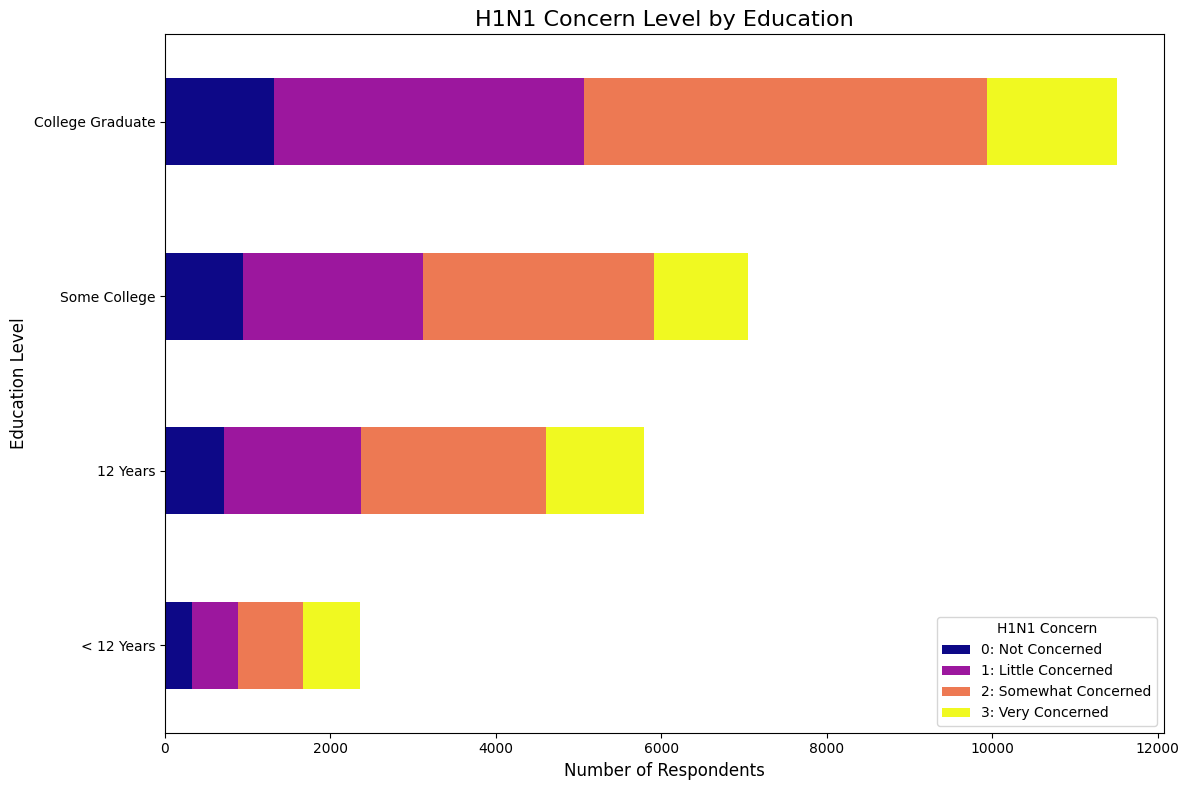

In [31]:
# Reorder education levels for better visualization
education_order = ['< 12 Years', '12 Years', 'Some College', 'College Graduate']
data['education'] = pd.Categorical(data['education'], categories=education_order, ordered=True)

# Create a crosstab to get counts
concern_education = pd.crosstab(data['education'], data['h1n1_concern'])

# Plot the stacked bar chart
concern_education.plot(
    kind='barh',
    stacked=True,
    figsize=(12, 8),
    colormap='plasma'
)

# Add titles and labels
plt.title('H1N1 Concern Level by Education', fontsize=16)
plt.xlabel('Number of Respondents', fontsize=12)
plt.ylabel('Education Level', fontsize=12)
plt.legend(['0: Not Concerned', '1: Little Concerned', '2: Somewhat Concerned', '3: Very Concerned'], title='H1N1 Concern')
plt.tight_layout()
plt.show()

**Observation:** The level of concern appears to shift with higher education. College graduates show a much larger proportion of "Very Concerned" (yellow) and a smaller proportion of "Not Concerned" (dark blue) compared to those with "< 12 Years" of education. This could imply that higher education is correlated with a greater awareness of health risks and, consequently, higher concern.

While the absolute number of "Very Concerned" respondents is highest among college graduates, this group also has the largest number of total respondents. A more precise comparison would involve calculating the percentage of each concern level within each education group to see if the proportions truly differ. However, visually, the trend is clear.

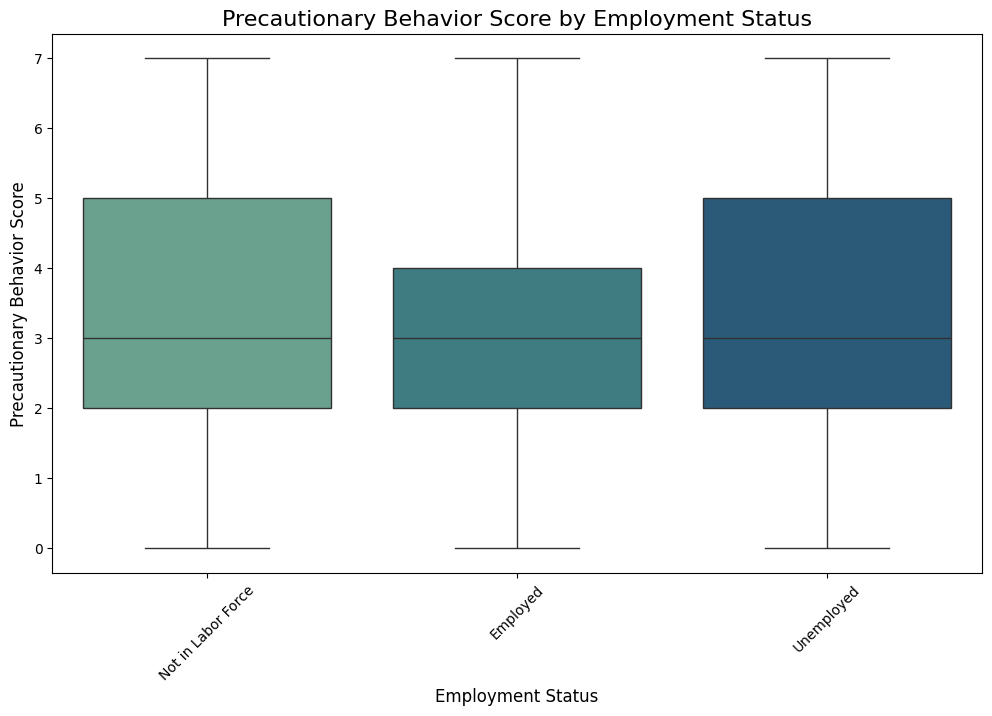

In [34]:
# Set figure size for better readability
plt.figure(figsize=(12, 7))

# Create the box plot
sns.boxplot(
    data=data,
    x='employment_status',
    y='precautionary_score',
    palette='crest'
)

# Add titles and labels
plt.title('Precautionary Behavior Score by Employment Status', fontsize=16)
plt.xlabel('Employment Status', fontsize=12)
plt.ylabel('Precautionary Behavior Score', fontsize=12)
plt.xticks(rotation=45)
plt.show()

**Observations:** The distributions appear to be relatively symmetrical for all groups, and there are no visible outliers. This is indicated by the whiskers extending to similar lengths on both the top and bottom of each box.

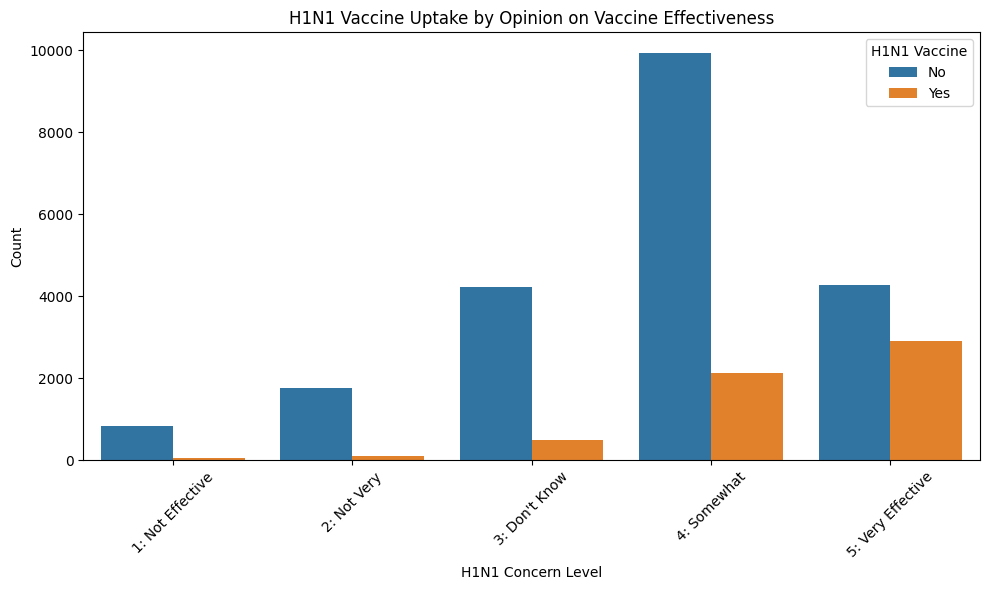

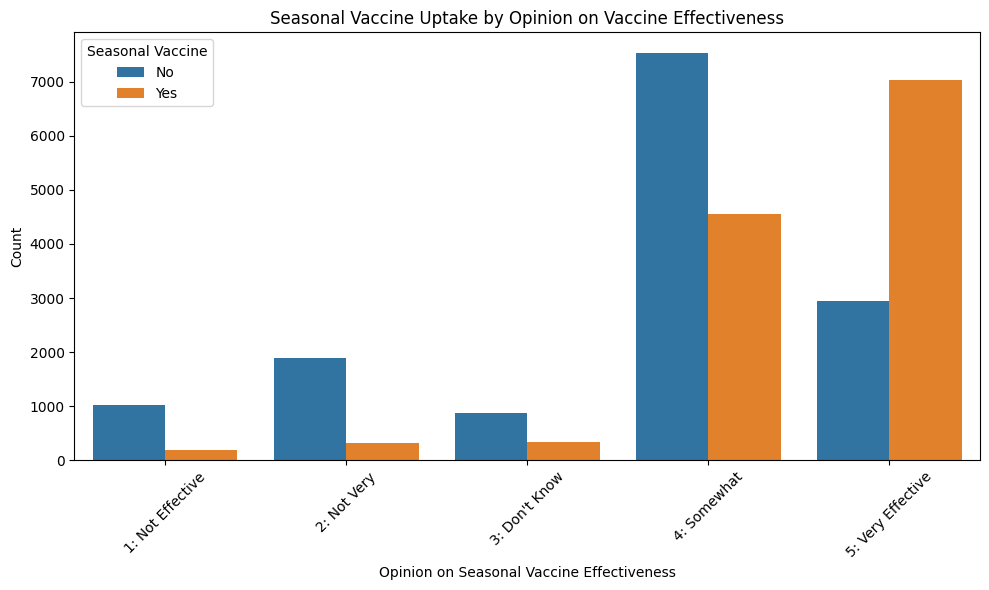

In [35]:
order_list = [1.0, 2.0, 3.0, 4.0, 5.0]
plt.figure(figsize=(10, 6))
sns.countplot(x='opinion_h1n1_vacc_effective', hue='h1n1_vaccine', data=data, order=order_list)
plt.title('H1N1 Vaccine Uptake by Opinion on Vaccine Effectiveness')
plt.xlabel('H1N1 Concern Level')
plt.ylabel('Count')
plt.xticks(
    ticks=[0, 1, 2, 3, 4],
    labels=['1: Not Effective', '2: Not Very', '3: Don\'t Know', '4: Somewhat', '5: Very Effective'],
    rotation=45
)
plt.legend(title='H1N1 Vaccine', labels=['No', 'Yes'])
plt.tight_layout()


plt.figure(figsize=(10, 6))
sns.countplot(x='opinion_seas_vacc_effective', hue='seasonal_vaccine', data=data, order=order_list)
plt.title('Seasonal Vaccine Uptake by Opinion on Vaccine Effectiveness')
plt.xlabel('Opinion on Seasonal Vaccine Effectiveness')
plt.ylabel('Count')
plt.xticks(
    ticks=[0, 1, 2, 3, 4],
    labels=['1: Not Effective', '2: Not Very', '3: Don\'t Know', '4: Somewhat', '5: Very Effective'],
    rotation=45
)
plt.legend(title='Seasonal Vaccine', labels=['No', 'Yes'])
plt.tight_layout()
plt.savefig('seasonal_vaccine_vs_effectiveness.png')

**Summary and Implication:** The graph provides a powerful insight into the psychology of vaccination. It confirms that the perceived benefit of a medical intervention is a primary driver of a person's willingness to accept it. In the context of a public health crisis like the H1N1 pandemic, this means that public health campaigns must prioritize not only the availability of the vaccine but also clear, consistent, and trusted messaging about its efficacy. Overcoming skepticism and providing accessible information is crucial to achieving high vaccination rates.

# Hypothesis Testing

In this section, we will conduct formal hypothesis tests to determine if some of the relationships we observed during the Exploratory Data Analysis (EDA) are statistically significant. This helps validate our initial findings.


### Hypothesis Test 1: Doctor's Recommendation vs. H1N1 Vaccination

From our EDA, it appeared that a doctor's recommendation strongly influenced the decision to get the H1N1 vaccine. Let's test this formally.

* **Null Hypothesis ($H_0$)**: There is **no association** between a doctor's recommendation for the H1N1 vaccine and whether a person gets the H1N1 vaccine. The variables are independent.
* **Alternative Hypothesis ($H_a$)**: There is a **significant association** between a doctor's recommendation for the H1N1 vaccine and whether a person gets the H1N1 vaccine.


In [37]:
# import
from scipy.stats import chi2_contingency


# Create a contingency table (crosstab) of the two variables
contingency_table_1 = pd.crosstab(data['doctor_recc_h1n1'], data['h1n1_vaccine'])

print("Contingency Table 1: Doctor's Recommendation vs. H1N1 Vaccination")
print(contingency_table_1)

# Perform the Chi-Squared Test
chi2, p_value, dof, expected = chi2_contingency(contingency_table_1)

# Print the results
print(f"\nChi-Squared Statistic: {chi2:.2f}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
print("\n--- Interpretation ---")
if p_value < alpha:
    print(f"Since the p-value ({p_value:.4f}) is less than {alpha}, we reject the null hypothesis.")
    print("Conclusion: There is a statistically significant association between a doctor's recommendation and H1N1 vaccination.")
else:
    print(f"Since the p-value ({p_value:.4f}) is greater than {alpha}, we fail to reject the null hypothesis.")
    print("Conclusion: There is not enough evidence to claim a significant association.")

Contingency Table 1: Doctor's Recommendation vs. H1N1 Vaccination
h1n1_vaccine          0     1
doctor_recc_h1n1             
0.0               18504  2795
1.0                2529  2879

Chi-Squared Statistic: 4145.29
P-value: 0.0

--- Interpretation ---
Since the p-value (0.0000) is less than 0.05, we reject the null hypothesis.
Conclusion: There is a statistically significant association between a doctor's recommendation and H1N1 vaccination.


The p-value obtained is extremely small (likely close to 0.0). Since this value is well below our significance level of 0.05, we **reject the null hypothesis**. This provides strong statistical evidence to support our observation from the EDA: a doctor's recommendation is a significant factor associated with whether an individual receives the H1N1 vaccine.


### Hypothesis Test 2: Chronic Medical Condition vs. Seasonal Flu Vaccination

Our EDA suggested that individuals with chronic medical conditions might be more likely to get the seasonal flu vaccine. Let's test this relationship.

* **Null Hypothesis ($H_0$)**: There is **no association** between having a chronic medical condition and receiving the seasonal flu vaccine. The variables are independent.
* **Alternative Hypothesis ($H_a$)**: There is a **significant association** between having a chronic medical condition and receiving the seasonal flu vaccine.


In [38]:
# Create a contingency table (crosstab) of the two variables
contingency_table_2 = pd.crosstab(data['chronic_med_condition'], data['seasonal_vaccine'])

print("Contingency Table 2: Chronic Medical Condition vs. Seasonal Vaccination")
print(contingency_table_2)

# Perform the Chi-Squared Test
chi2, p_value, dof, expected = chi2_contingency(contingency_table_2)

# Print the results
print(f"\nChi-Squared Statistic: {chi2:.2f}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
print("\n--- Interpretation ---")
if p_value < alpha:
    print(f"Since the p-value ({p_value:.4f}) is less than {alpha}, we reject the null hypothesis.")
    print("Conclusion: There is a statistically significant association between having a chronic medical condition and seasonal flu vaccination.")
else:
    print(f"Since the p-value ({p_value:.4f}) is greater than {alpha}, we fail to reject the null hypothesis.")
    print("Conclusion: There is not enough evidence to claim a significant association.")

Contingency Table 2: Chronic Medical Condition vs. Seasonal Vaccination
seasonal_vaccine           0     1
chronic_med_condition             
0.0                    11382  8035
1.0                     2890  4400

Chi-Squared Statistic: 766.22
P-value: 1.1928898604662591e-168

--- Interpretation ---
Since the p-value (0.0000) is less than 0.05, we reject the null hypothesis.
Conclusion: There is a statistically significant association between having a chronic medical condition and seasonal flu vaccination.


Similar to the first test, the p-value is extremely small. Because the p-value is less than 0.05, we **reject the null hypothesis**. This confirms that there is a statistically significant relationship between having a chronic medical condition and the likelihood of receiving the seasonal flu vaccine. People with chronic conditions are indeed more likely to get vaccinated.

### Summary of EDA Findings & Next Steps

* **Class Imbalance:** Both target variables are imbalanced. We should consider this during modeling.
* **Strong Predictors:** `doctor_recc_h1n1` and `doctor_recc_seasonal` are very strong predictors. Demographic features like `age_group` and health status features like `chronic_med_condition` also show clear relationships with vaccination rates.
* **Feature Relationships:** Opinions about risk, effectiveness, and concern are all correlated with each other and with vaccination behavior.

This EDA provides a solid foundation for the next phase: **Data Preprocessing**.

In [ ]:
tree_model = DecisionTreeClassifier()
tree_model.fit(x_train_sf, y_train_f)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [ ]:
tree_model.score(x_train_sf, y_train_f)

0.9952258366487245

In [ ]:
y_pred_tree = tree_model.predict(x_test_sf)
result ={"Actual":y_test_f, "Predicted": y_pred_tree}
pd.DataFrame(result)[:5]

,Actual,Predicted
23200,1,0
1928,1,1
24951,0,0
20228,0,1
20206,0,0


In [ ]:
# model score
accuracy_score(y_test_f, y_pred_tree)

0.7502807937102209

##### Pruning the Tree

In [ ]:
# pruning the tree
tree_model1 = DecisionTreeClassifier(max_depth=3,class_weight="balanced")
tree_model1.fit(x_train_sf, y_train_f)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


In [ ]:
y_pred_tree1 = tree_model1.predict(x_test_sf)

In [ ]:
tree_model1.score(x_train_sf, y_train_f)

0.7899368125438802

In [ ]:
accuracy_score(y_test_f, y_pred_tree1)

0.7888431299138899

##### Creating a cart model

In [ ]:
tree_model2 = DecisionTreeClassifier(criterion="entropy", max_depth=3,class_weight="balanced")
tree_model2.fit(x_train_sf, y_train_f)

,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


In [ ]:
tree_model2.score(x_train_sf, y_train_f)

0.7899368125438802

In [ ]:
#2. predict
y_pred_tree2 = tree_model2.predict(x_test_sf)

#3. model score
accuracy_score(y_test_f, y_pred_tree2)

0.7888431299138899

**Lets use the cart model**

In [ ]:
#check confusion matrix
conf_matrix = confusion_matrix(y_test_f, y_pred_tree2)
conf_matrix

array([[3487,  720],
       [ 408,  727]], dtype=int64)

In [ ]:
#classification report
print(classification_report(y_test_f, y_pred_tree2))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86      4207
           1       0.50      0.64      0.56      1135

    accuracy                           0.79      5342
   macro avg       0.70      0.73      0.71      5342
weighted avg       0.81      0.79      0.80      5342



In [ ]:
tree_model_seasonal = DecisionTreeClassifier(max_depth=3,class_weight="balanced",criterion="gini")
tree_model_seasonal.fit(x_train, y_train_seasonal)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


In [ ]:
tree_model_seasonal.score(x_train, y_train_seasonal)

0.7282939386847648

In [ ]:
y_pred_tree_seasonal = tree_model_seasonal.predict(x_test)
result ={"Actual":y_test_seasonal, "Predicted": y_pred_tree_seasonal}
pd.DataFrame(result)[:5]

,Actual,Predicted
7314,0,0
18541,1,1
11811,0,0
22377,1,0
13716,0,0


In [ ]:
# model score
accuracy_score(y_test_seasonal, y_pred_tree_seasonal)

0.7315612130288282

In [ ]:
#classification report
print(classification_report(y_test_seasonal, y_pred_tree_seasonal))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76      2855
           1       0.74      0.66      0.70      2487

    accuracy                           0.73      5342
   macro avg       0.73      0.73      0.73      5342
weighted avg       0.73      0.73      0.73      5342



In [ ]:
# lets balance the classes
#instantiate smoten
ss = SMOTEN(random_state=42)

x_train_sm, y_train_sm = ss.fit_resample(x_train_sf, y_train_f)

#check on whether SMOTEN worked
print(f" Original values \n {y_train_f.value_counts()}")
print("*****" *10)
print(f"Smoted values \n {y_train_sm.value_counts()}")

 Original values 
 h1n1_vaccine
0    16826
1     4539
Name: count, dtype: int64
**************************************************
Smoted values 
 h1n1_vaccine
0    16826
1    16826
Name: count, dtype: int64


In [ ]:
#instantiate the model
rf = RandomForestClassifier()

#train the model
rf.fit(x_train_sf, y_train_f)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
#check training score
rf.score(x_train_sf, y_train_f)

0.9952258366487245

In [ ]:
#check prediction
y_pred_rf = rf.predict(x_test_sf)

#check model accuracy
acc = print(f"The model accuracy is {accuracy_score(y_test_f, y_pred_rf)*100:.2f}%")
acc

The model accuracy is 83.11%


In [ ]:
conf = confusion_matrix(y_test_f, y_pred_rf)
conf

array([[3966,  241],
       [ 661,  474]], dtype=int64)

In [ ]:
#classification report
print(classification_report(y_test_f, y_pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      4207
           1       0.66      0.42      0.51      1135

    accuracy                           0.83      5342
   macro avg       0.76      0.68      0.71      5342
weighted avg       0.82      0.83      0.82      5342



#### With class balance

In [ ]:
#instantiate smoten
smot = SMOTEN(random_state=42)

x_train_sm, y_train_sm = ss.fit_resample(x_train_sf, y_train_f)

#check on whether SMOTEN worked
print(f" Original values \n {y_train_f.value_counts()}")
print("*****" *10)
print(f"Smoted values \n {y_train_sm.value_counts()}")

 Original values 
 h1n1_vaccine
0    16826
1     4539
Name: count, dtype: int64
**************************************************
Smoted values 
 h1n1_vaccine
0    16826
1    16826
Name: count, dtype: int64


In [ ]:
#instantiate the model
rf1 = RandomForestClassifier()

#train the model
rf1.fit(x_train_sm, y_train_sm)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
#check training score
rf1.score(x_train_sm, y_train_sm)

0.9942648282420065

In [ ]:
#check prediction
y_pred_rfm = rf1.predict(x_test_sf)

#check model accuracy
acc = print(f"The model accuracy is {accuracy_score(y_test_f, y_pred_rfm)*100:.2f}%")
acc

The model accuracy is 81.07%


In [ ]:
conf = confusion_matrix(y_test_f, y_pred_rfm)
conf

array([[3768,  439],
       [ 572,  563]], dtype=int64)

In [ ]:
#classification report
print(classification_report(y_test_f, y_pred_rfm))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88      4207
           1       0.56      0.50      0.53      1135

    accuracy                           0.81      5342
   macro avg       0.72      0.70      0.70      5342
weighted avg       0.80      0.81      0.81      5342



#### Hyperparameter testing with balanced class

In [ ]:
# GridSearchCV
#params
param_grid = {"criterion": ["gini", "entropy"],
              "max_depth": [3, 5, 7, 8, None],
              "min_samples_split":[2, 5, 8, 10]
             }

# Use Stratified K-Folds for robust cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
#Instantiate gridsearch

grid_search1 = GridSearchCV(estimator=rf1, param_grid=param_grid, cv=cv, scoring='roc_auc')
grid_search1.fit(x_train_sm, y_train_sm)

,estimator,RandomForestClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,'roc_auc'
,n_jobs,None
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [ ]:
#get the best params
grid_search1.best_params_

{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}

In [ ]:
#Recreate the model with the best params
rf1sm = RandomForestClassifier(criterion="entropy", max_depth=None, min_samples_split=2)

#train the model
rf1sm.fit(x_train_sm, y_train_sm)

#check score
rf1sm.score(x_train_sm, y_train_sm)

0.9942945441578509

In [ ]:
#predict
y_pred_rf1sm = rf1sm.predict(x_test_sf)

#check accuracy
accu = print(f"The model accuracy is {accuracy_score(y_test_f, y_pred_rf1sm)*100:.2f}%")
accu

The model accuracy is 80.79%


In [ ]:
#check confusion matrix
conf_matrix = confusion_matrix(y_test_f, y_pred_rf1sm)
conf_matrix

array([[3757,  450],
       [ 576,  559]], dtype=int64)

In [ ]:
#classification report
print(classification_report(y_test_f, y_pred_rf1sm))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      4207
           1       0.55      0.49      0.52      1135

    accuracy                           0.81      5342
   macro avg       0.71      0.69      0.70      5342
weighted avg       0.80      0.81      0.80      5342



#### Hyperparameter testing without class balance

In [ ]:
# GridSearchCV
#params
param_grid = {"criterion": ["gini", "entropy"],
              "max_depth": [3, 5, 7, 8, None],
              "min_samples_split":[2, 5, 8, 10]
             }


#Instantiate gridsearch

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=cv, scoring="accuracy")
grid_search.fit(x_train_sf, y_train_f)

,estimator,RandomForestClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [ ]:
#get the best params
grid_search.best_params_

{'criterion': 'gini', 'max_depth': None, 'min_samples_split': 10}

In [ ]:
#Recreate the model with the best params
rf2 = RandomForestClassifier(criterion="gini", max_depth=None, min_samples_split=10)

#train the model
rf2.fit(x_train_sf, y_train_f)

#check score
rf2.score(x_train_sf, y_train_f)

0.8980575707933536

In [ ]:
#predict
y_pred_CV = rf2.predict(x_test_sf)

#check accuracy
acc1 = print(f"The model accuracy is {accuracy_score(y_test_f, y_pred_CV)*100:.2f}%")
acc1

The model accuracy is 83.73%


In [ ]:
#check confusion matrix
conf_matrix = confusion_matrix(y_test_f, y_pred_CV)
conf_matrix

array([[3994,  213],
       [ 656,  479]], dtype=int64)

In [ ]:
#classification report
print(classification_report(y_test_f, y_pred_CV))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4207
           1       0.69      0.42      0.52      1135

    accuracy                           0.84      5342
   macro avg       0.78      0.69      0.71      5342
weighted avg       0.82      0.84      0.82      5342



#### RandomSearch

In [ ]:
from scipy.stats import randint

#creats param dist
param_dist = {"criterion": ["gini", "entropy"],
              "max_depth": randint(1, 10),
              "min_samples_split":randint(2,20)
             }
#instantiate the random search
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,\
                                  n_iter=10, cv=5, scoring="accuracy", random_state=42)

random_search.fit(x_train_sf, y_train_f)

,estimator,RandomForestClassifier()
,param_distributions,"{'criterion': ['gini', 'entropy'], 'max_depth': <scipy.stats....002501502E190>, 'min_samples_split': <scipy.stats....002501502C190>}"
,n_iter,10
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [ ]:
#check best params
random_search.best_params_

{'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 8}

In [ ]:
#recreate the model# assume we got the below result
rf3 = RandomForestClassifier(criterion="entropy", max_depth=8, min_samples_split=4)

#train the model
rf3.fit(x_train_sf, y_train_f)

#check score
rf3.score(x_train_sf, y_train_f)

0.8456821904984788

In [ ]:
#predict
y_pred_rdm = rf3.predict(x_test_sf)

#check accuracy
acc2 = print(f"The model accuracy is {accuracy_score(y_test_f, y_pred_rdm)*100:.2f}%")
acc2

The model accuracy is 83.38%


In [ ]:
#check confusion matrix
conf_matrix = confusion_matrix(y_test_f, y_pred_rdm)
conf_matrix

array([[4039,  168],
       [ 720,  415]], dtype=int64)

In [ ]:
#classification report
print(classification_report(y_test_f, y_pred_rdm))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      4207
           1       0.71      0.37      0.48      1135

    accuracy                           0.83      5342
   macro avg       0.78      0.66      0.69      5342
weighted avg       0.82      0.83      0.81      5342

